## <font color=green>Day-7</font>

- Our topic of discussion is <font color=green size="4">**Principal Component Analysis for Dimentionality Reduction**</font>
- Dataset That we would be using : AirBnb
    - The Dataset has already been downloaded and is placed in the folder ./Dataset/Classification/
    - Incase if you face any problems, you can download that dataset from kaggle using the link https://www.kaggle.com/code/fireballbyedimyrnmom/predict-airbnb-prices/data
    
- Sections
    0. **Learning Contents about Principal Component Analysis**
    1. Importing Headers
    2. Importing Data
    3. Data Exploration
    4. Data Encoding
    5. Handling Missing Values
    6. Training model to predict Y-Values(reviews_per_month) using Linear Regression
        - 6.1. Training model to predict Y-Values(reviews_per_month) using Linear Regression
            - 6.1.1 Data Preparation
            - 6.1.2 Model Evaluation
            - 6.1.3 Replacing the NULL values
    7. Data Preparation
        - 7.1 Dimentionality Reduction : PCA
        - 7.2. Visualization
    9. Modelling
    10. Model Evaluation

### Author of the Document : <font color="Green">Karnati Sai Venkata Giri</font>
### Feel free to reach me out at : <font color="Green">karnatisaivenkatagiri@gmail.com</font>

## Learning : Linear Discriminant Analysis

1. What is PCA? : [Link](https://www.youtube.com/watch?v=FgakZw6K1QQ)
2. Best Blog on PCA : [Link](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c)
3. Layman Explanation of PCA : [Link](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)

## 1. Importing Headers

In [1]:
# Computation Libraries
import numpy as np
import pandas as pd

# Stats Libraries
import statistics as stats

# Visualisazition Libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Modelling Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Evaluation Metrics Libraries
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

## 2. Importing Data


In [2]:
df = pd.read_csv("./Dataset/Dimension_Reduction/airbnb.csv")
print("The dataset has {0} rows and {1} features".format(len(df),len(df.columns)))
df.head(5)

The dataset has 48895 rows and 16 features


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### <font color=green>Inferences</font>
- We have 48895 rows and 16 features
- Our Target Feature is "Species"


Analysis

- Input Features : 
    1. neighbourhood_group
    2. latitude
    3. longitude
    4. room_type
    6. minimum_nights
    7. number_of_reviews
    10. calculated_host_listings_count
    10. availability_365
- Output-1 (For Data Preparation) :
    1. reviews_per_month
- Output-2 (Model Training)    
    1. price

## 3. Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### <font color=green>Inferences</font>
- The name and the host name dont constitute much to the output. We can ignore them while training
- We shall be replacing reviews_per_month categories using the PCA and Linear Regression



In [4]:
# Lets remove few unwanted data before proceeding to futher steps
df.drop(["id","name","host_id","host_name","last_review"],axis=1,inplace=True)

In [5]:
df.duplicated().sum()

0

In [6]:
df.nunique()

neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [7]:
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## 4. Data Encoding

In [8]:
df["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [9]:
label_encoder = LabelEncoder()
df["neighbourhood_group"] = label_encoder.fit_transform(df["neighbourhood_group"])

In [10]:
df["neighbourhood"].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [11]:
df["neighbourhood"] = label_encoder.fit_transform(df["neighbourhood"])

In [12]:
df["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [13]:
df["room_type"] = label_encoder.fit_transform(df["room_type"])

In [14]:
df.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,108,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,2,127,40.75362,-73.98377,0,225,1,45,0.38,2,355
2,2,94,40.80902,-73.94190,1,150,3,0,NaN,1,365
3,1,41,40.68514,-73.95976,0,89,1,270,4.64,1,194
4,2,61,40.79851,-73.94399,0,80,10,9,0.10,1,0


## 5. Handling Missing Values

In [15]:
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### <font color=green>Inferences</font>
- Theres are considerate amount of missing values in 'reviews_per_month'. 
- In the Further steps we are going to apply PCA and find most contributing PC's and approximate the number of features to consider and further apply linear regression on the reduced number of components and fill the null values

In [16]:
# Splitting data with null and not NUll
df_without_null = df[df["reviews_per_month"].isnull()==False]
X_WN = df_without_null.drop(["reviews_per_month"],axis=1)
Y_WN = df_without_null["reviews_per_month"]
print("DF without NULL Values : ",len(df_without_null))

df_null = df[df["reviews_per_month"].isnull()==True]
X_N = df_null.drop(["reviews_per_month"],axis=1)
Y_N = df_null["reviews_per_month"]
print("DF with NULL Values : ",len(df_null))    

DF without NULL Values :  38843
DF with NULL Values :  10052


In [17]:
scalar = StandardScaler()
scaled_data = scalar.fit_transform(X_WN)

In [18]:
pca = PCA(n_components = 10)
x_pca = pca.fit_transform(scaled_data)

In [19]:
component_names = [f"PC{i+1}" for i in range(x_pca.shape[1])]
X_WN_df = pd.DataFrame(x_pca, columns=component_names)
X_WN_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.592939,1.080415,1.337563,0.324056,0.245401,-0.752149,1.609367,0.542148,-0.806128,-0.656468
1,1.093945,-0.544542,1.134903,-0.852537,0.145358,-0.229026,0.278318,0.219280,-0.308357,-1.361146
2,-1.076280,0.876770,2.570222,-3.394779,1.681768,-0.697994,-1.980124,-0.527474,0.763732,0.728798
3,0.384931,-0.523151,-0.840026,0.226947,-0.438284,0.867694,-1.114646,-0.294513,0.758292,-0.504805
4,0.871369,-0.356380,0.133452,-1.101369,0.326510,-0.192220,-0.586140,-0.086800,-0.096628,-0.163260


In [20]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

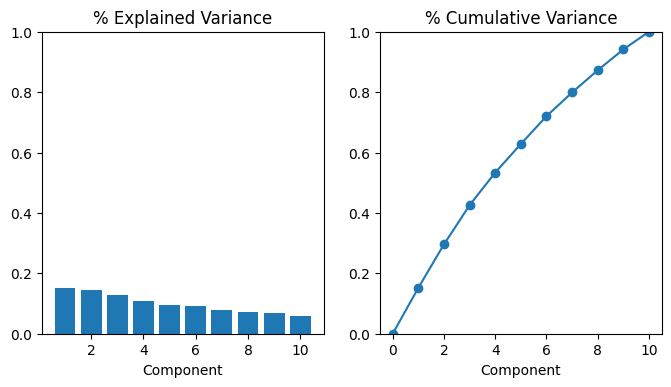

In [21]:
plot_variance(pca)

<AxesSubplot:>

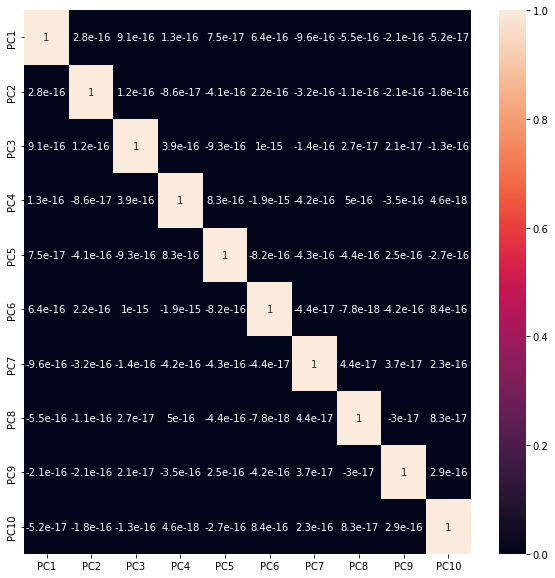

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(X_WN_df.corr(),annot=True)

### <font color=green>Inferences</font>
- As we would have expected there are no relationships between the prinincipal componenets
- We could actualy proceed with 8 principal components as the contribution of PC9, PC10 is not that significatnt

In [23]:
pca = PCA(n_components = 8)
x_pca = pca.fit_transform(scaled_data)

component_names = [f"PC{i+1}" for i in range(x_pca.shape[1])]
X_WN_df = pd.DataFrame(x_pca, columns=component_names)
X_WN_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.592939,1.080415,1.337563,0.324056,0.245401,-0.752149,1.609367,0.542148
1,1.093945,-0.544542,1.134903,-0.852537,0.145358,-0.229026,0.278318,0.219280
2,-1.076280,0.876770,2.570222,-3.394779,1.681768,-0.697994,-1.980124,-0.527474
3,0.384931,-0.523151,-0.840026,0.226947,-0.438284,0.867694,-1.114646,-0.294513
4,0.871369,-0.356380,0.133452,-1.101369,0.326510,-0.192220,-0.586140,-0.086800


array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

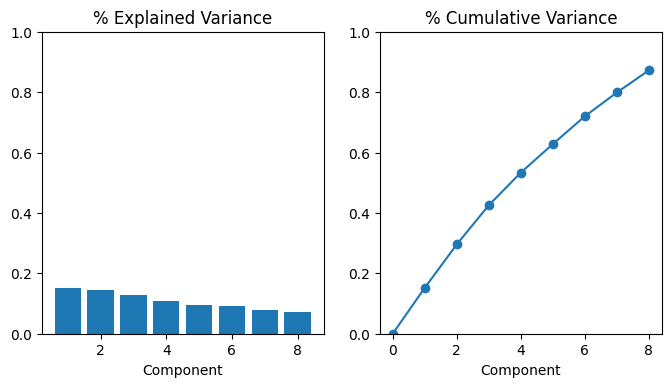

In [24]:
plot_variance(pca)

### 6.1. Training model to predict Y-Values(reviews_per_month) using Linear Regression

### 6.1.1 Data Preparation

In [25]:
print(X_WN_df.shape,Y_WN.shape)
train_x_wn,test_x_wn,train_y_wn,test_y_wn = train_test_split(X_WN_df,Y_WN, test_size = 0.2,random_state = 42)

(38843, 8) (38843,)


### 6.1.2 Model Evaluation

In [26]:
model = LinearRegression()
model.fit(train_x_wn,train_y_wn)

LinearRegression()

In [27]:
pred_train  = model.predict(train_x_wn)
pred_test  = model.predict(test_x_wn)
print('Training-set accuracy score: {0:0.4f}'. format(model.score(train_x_wn, pred_train)))
print('Testing-set accuracy score: {0:0.4f}'. format(model.score(test_x_wn, pred_test)))

Training-set accuracy score: 1.0000
Testing-set accuracy score: 1.0000


### 6.1.3 Replacing the NULL values

In [28]:
scalar = StandardScaler()
scaled_data = scalar.fit_transform(X_N)

pca = PCA(n_components = 8)
x_pca = pca.fit_transform(scaled_data)

component_names = [f"PC{i+1}" for i in range(x_pca.shape[1])]
X_N_df = pd.DataFrame(x_pca, columns=component_names)
X_N_df.head()

Y_N = model.predict(X_N_df)

In [29]:
X = X_WN.append(X_N, ignore_index=True)
y1 = pd.DataFrame(Y_WN)
y2 = pd.DataFrame(Y_N, columns = ["reviews_per_month"])
Y = y1.append(y2, ignore_index=True)

df_new = X
df_new["reviews_per_month"] = Y

/tmp/ipykernel_23362/3525325413.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X = X_WN.append(X_N, ignore_index=True)
/tmp/ipykernel_23362/3525325413.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Y = y1.append(y2, ignore_index=True)


In [30]:
df_new.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
reviews_per_month                 0
dtype: int64

### **Good going!!**
 - We have resolved the problem of NULL Values and now we can predict the prices of Airbnb rooms using the availabe data

## 7. Data Preparation

In [31]:
X = df_new.drop(["price"],axis = 1)
Y = df_new["price"]

### 7.1 Dimentionality Reducton

array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

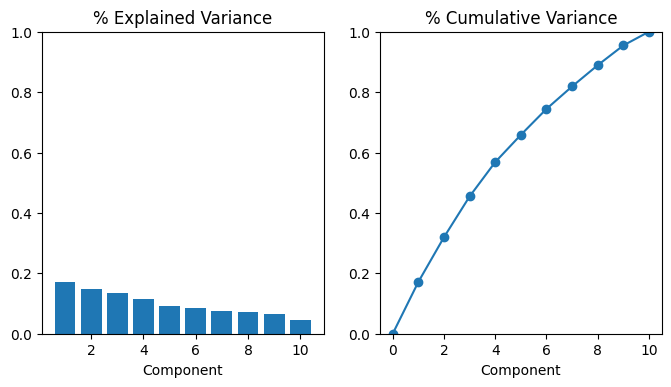

In [32]:
scalar = StandardScaler()
scaled_data = scalar.fit_transform(X)

pca = PCA(n_components = 10)
x_pca = pca.fit_transform(scaled_data)

component_names = [f"PC{i+1}" for i in range(x_pca.shape[1])]
X_df = pd.DataFrame(x_pca, columns=component_names)
plot_variance(pca)

<AxesSubplot:>

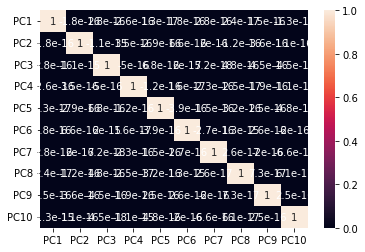

In [33]:
sns.heatmap(X_df.corr(),annot=True)

### <font color=green>Inferences</font>
- As we would have expected there are no relationships between the prinincipal componenets
- We could actualy proceed with 7 principal components as the contribution of PC8, PC9, PC10 is not that significatnt

array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

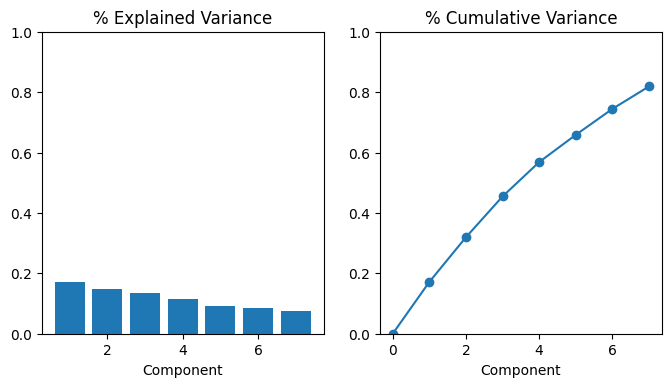

In [34]:
scalar = StandardScaler()
scaled_data = scalar.fit_transform(X)

pca = PCA(n_components = 7)
x_pca = pca.fit_transform(scaled_data)

component_names = [f"PC{i+1}" for i in range(x_pca.shape[1])]
X_df = pd.DataFrame(x_pca, columns=component_names)
plot_variance(pca)

In [35]:
print(X_df.shape,Y.shape)
train_x,test_x,train_y,test_y  = train_test_split(X_df,Y, test_size = 0.2,random_state = 42)

(48895, 7) (48895,)


## 8. Modelling

In [36]:
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

## 9. Model Evaluation

In [37]:
pred_test = model.predict(test_x)
print("Residual sum of squares (MSE): %.2f" % np.mean((pred_test - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , pred_test) )

Residual sum of squares (MSE): 38671.41
R2-score: 0.11


### <font color=green>Conclusion</font>
- Prinicipal Component Analysis with Linear Regression has been successfully applied on airbnb dataset
- Missing values are also handled by training a Linear Regression model with pre_processing applied with PCA

<img src="./Data/thank.jpg"/>
---------------------------------------------------------------------------------------- END OF NOTEBOOK -------------------------------------------------------------------------------------